<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# **1. Relational Graph**

In [98]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data ==>>")
print(df_residents_65plus.head())

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data ==>>")
print(df_nursinghome.head())

Residents 65Plus Data ==>>
     Age Category  Living With Spouse & At Least One Child In Household  \
year                                                                      
2024    Sub-Total                                             271800      
2023    Sub-Total                                             243700      
2022    Sub-Total                                             255800      
2021    Sub-Total                                             221800      
2020    Sub-Total                                             214600      

      Living With Spouse, No Children In Household  Living Alone In Household  \
year                                                                            
2024                                        208600                      87200   
2023                                        197000                      78100   
2022                                        173900                      78600   
2021                                      

In [3]:
# Prepare Residents Data
# Keep only year and total residents aged 65+
df_residents = df_residents_65plus.reset_index()[['year', 'Total']].copy()
df_residents['Total'] = pd.to_numeric(df_residents['Total'], errors='coerce')

# Group by year
df_residents = df_residents.groupby('year', as_index=False)['Total'].sum()
df_residents = df_residents.rename(columns={'Total': 'Residents65Plus'})

# Prepare Nursing Home Data
# Sum total number of beds by year
df_nursinghome_beds = df_nursinghome.reset_index().groupby('year', as_index=False)['no_beds'].sum()
df_nursinghome_beds = df_nursinghome_beds.rename(columns={'no_beds': 'NursingHomeBeds'})

# Merge both datasets by year
df_merge = pd.merge(df_residents, df_nursinghome_beds, on='year', how='inner')

In [4]:
# Relational Graph (Scatter Plot with Regression Line)
# Showing the correlation how the number of nursing home beds relates to number of elderly residents (65+).

# Define plotting function
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds", s=100)
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    for _, row in df.iterrows():
        plt.text(row["Residents65Plus"], row["NursingHomeBeds"], str(row["year"]),
                 fontsize=8, ha='right', va='bottom')

    # Add Title and Labels
    plt.title("Relation: Elderly Residents (65+) vs Nursing Home Beds (Singapore)")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

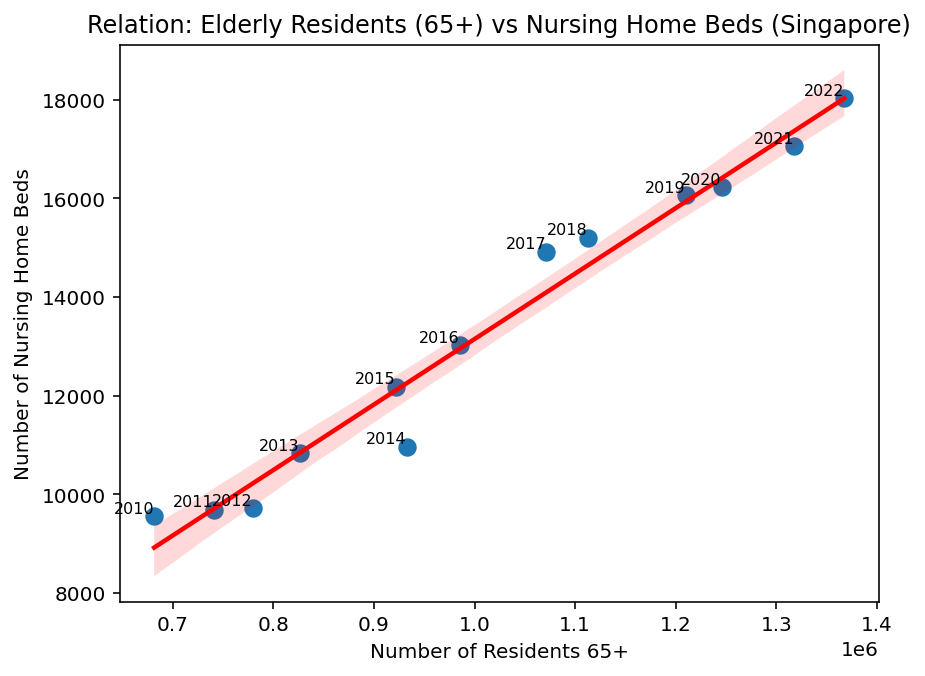

In [5]:
# General correlation between elderly residents (65+) and available nursing home beds.
# Call the plotting function
plot_relational(df_merge)

In [6]:
# Display the merged dataset for verification
print("\nMerged Dataset (for plotting):")
print(df_merge)


Merged Dataset (for plotting):
    year  Residents65Plus  NursingHomeBeds
0   2010           681500             9551
1   2011           740600             9690
2   2012           779700             9721
3   2013           826200            10838
4   2014           932700            10968
5   2015           921900            12185
6   2016           985400            13022
7   2017          1071200            14918
8   2018          1112600            15205
9   2019          1210000            16059
10  2020          1245900            16221
11  2021          1317800            17064
12  2022          1367600            18029


# **2. Categorical Graph**

In [7]:
# Load the datasets
df_health_facilities = pd.read_csv('DataGov_Health Facilities_Public.csv', index_col='year')

# Print out the dataframe
print("Health Facilites Data:")
print(df_health_facilities.head())

Health Facilites Data:
     institution_type facility_type_a  public_private  no_of_facilities  \
year                                                                      
2009         Hospital           Acute          Public                 7   
2009         Hospital           Acute  Not-for-Profit                 1   
2009         Hospital           Acute         Private                 6   
2010         Hospital           Acute          Public                 8   
2010         Hospital           Acute  Not-for-Profit                 1   

      no_beds  
year           
2009     6416  
2009      303  
2009     1570  
2010     6871  
2010      283  


In [8]:
print("Dataset Preview:")
print(df_residents)

Dataset Preview:
    year  Residents65Plus
0   2010           681500
1   2011           740600
2   2012           779700
3   2013           826200
4   2014           932700
5   2015           921900
6   2016           985400
7   2017          1071200
8   2018          1112600
9   2019          1210000
10  2020          1245900
11  2021          1317800
12  2022          1367600
13  2023          1417300
14  2024          1535800


In [9]:
# Data Preparation
# Convert numeric columns to numbers (some are stored as strings)
cols_to_convert = [
    'Living With Spouse & At Least One Child In Household',
    'Living With Spouse, No Children In Household',
    'Living Alone In Household',
    'Living With Children But Without Spouse In Household',
    'Others',
    'Total'
]
df_residents_65plus[cols_to_convert] = df_residents_65plus[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Focus on Sub-Total rows (not specific age groups)
df_subtotal = df_residents_65plus[df_residents_65plus['Age Category'] == 'Sub-Total'].copy()

# Reset index to make 'year' a column
df_subtotal = df_subtotal.reset_index()

# Melt dataframe to long format for easy plotting
df_melted = df_subtotal.melt(
    id_vars=['year'],
    value_vars=[
        'Living With Spouse & At Least One Child In Household',
        'Living With Spouse, No Children In Household',
        'Living Alone In Household',
        'Living With Children But Without Spouse In Household',
        'Others'
    ],
    var_name='Living_Arrangement',
    value_name='Number_of_Residents'
)

In [10]:
print("\nTransformed Data for Categorical Plot:")
print(df_melted)


Transformed Data for Categorical Plot:
    year                                 Living_Arrangement  \
0   2024  Living With Spouse & At Least One Child In Hou...   
1   2023  Living With Spouse & At Least One Child In Hou...   
2   2022  Living With Spouse & At Least One Child In Hou...   
3   2021  Living With Spouse & At Least One Child In Hou...   
4   2020  Living With Spouse & At Least One Child In Hou...   
..   ...                                                ...   
70  2014                                             Others   
71  2013                                             Others   
72  2012                                             Others   
73  2011                                             Others   
74  2010                                             Others   

    Number_of_Residents  
0                271800  
1                243700  
2                255800  
3                221800  
4                214600  
..                  ...  
70                299

In [11]:
# Function 1: Stacked Bar Chart
def plot_categorical_stacked_bar(df):
    """
    Categorical Graph: Stacked Bar Chart comparing living arrangements of elderly residents by year.
    """
    # Pivot data to make categories as columns
    df_pivot = df.pivot(index='year', columns='Living_Arrangement', values='Number_of_Residents')

    # Sort by year for correct order
    df_pivot = df_pivot.sort_index()

    # Plot stacked bar chart
    ax = df_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20',
        edgecolor='black'
    )

    plt.title("Stacked Bar Chart: Living Arrangements of Residents Aged 65+ by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Residents")
    plt.legend(title='Living Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

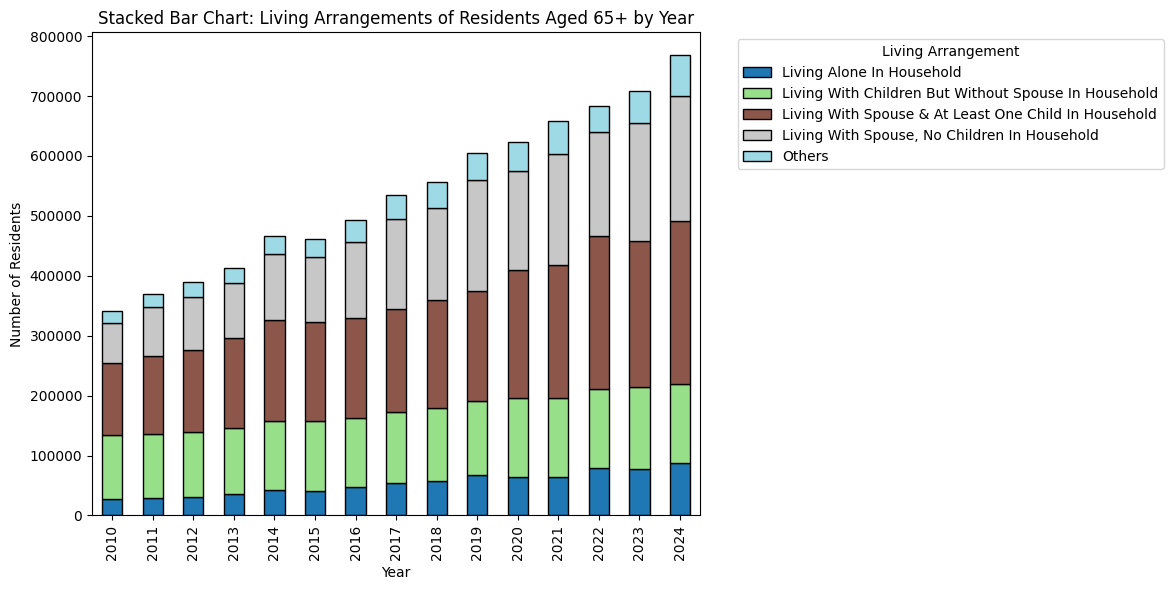

In [12]:
# Call the Functions
plot_categorical_stacked_bar(df_melted)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              210 non-null    int64 
 1   institution_type  210 non-null    object
 2   facility_type_a   210 non-null    object
 3   public_private    210 non-null    object
 4   no_of_facilities  210 non-null    int64 
 5   no_beds           210 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.0+ KB
None

First few rows:
   year institution_type facility_type_a  public_private  no_of_facilities  \
0  2009         Hospital           Acute          Public                 7   
1  2009         Hospital           Acute  Not-for-Profit                 1   
2  2009         Hospital           Acute         Private                 6   
3  2010         Hospital           Acute          Public                 8   
4  2010         Hospital           Acute  Not-for-P

<Figure size 640x480 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

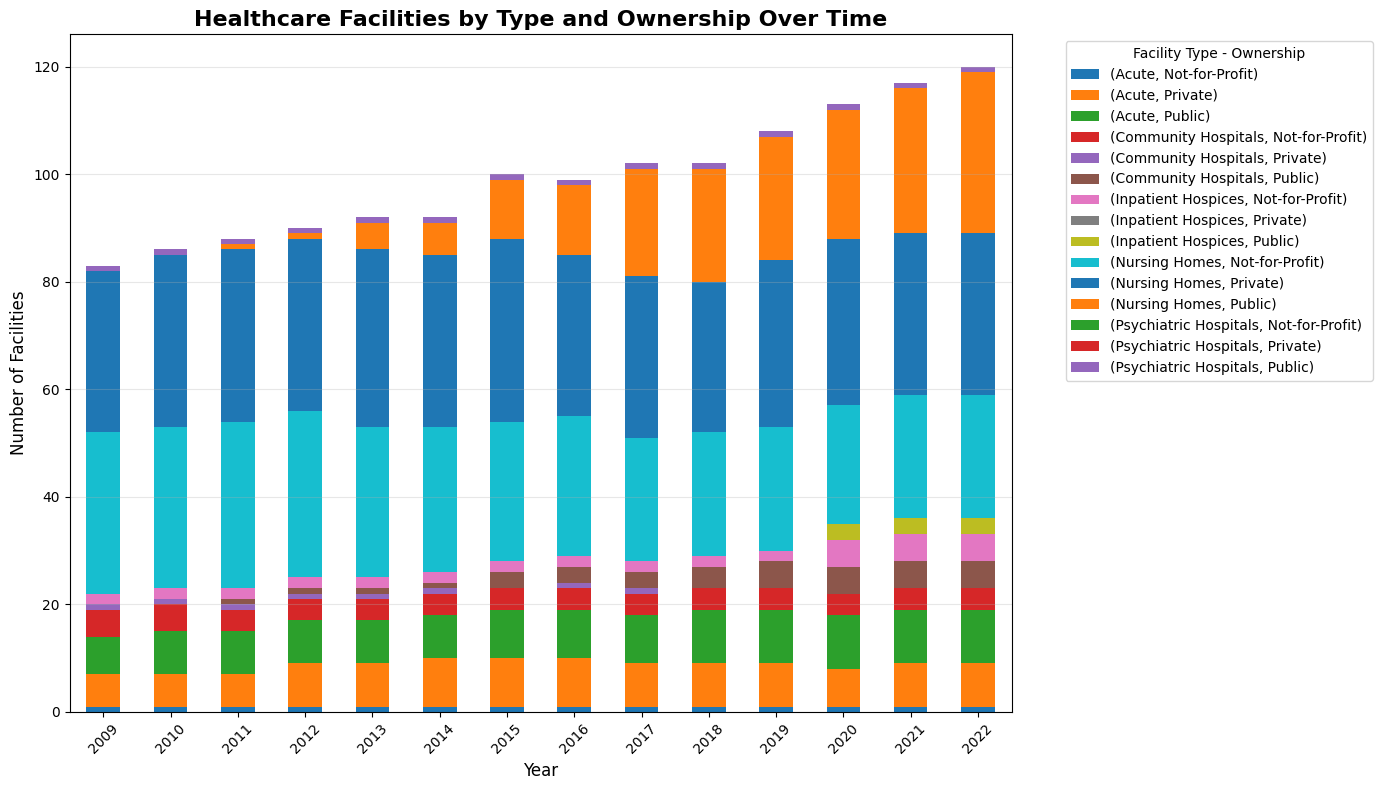

<Figure size 1200x600 with 0 Axes>

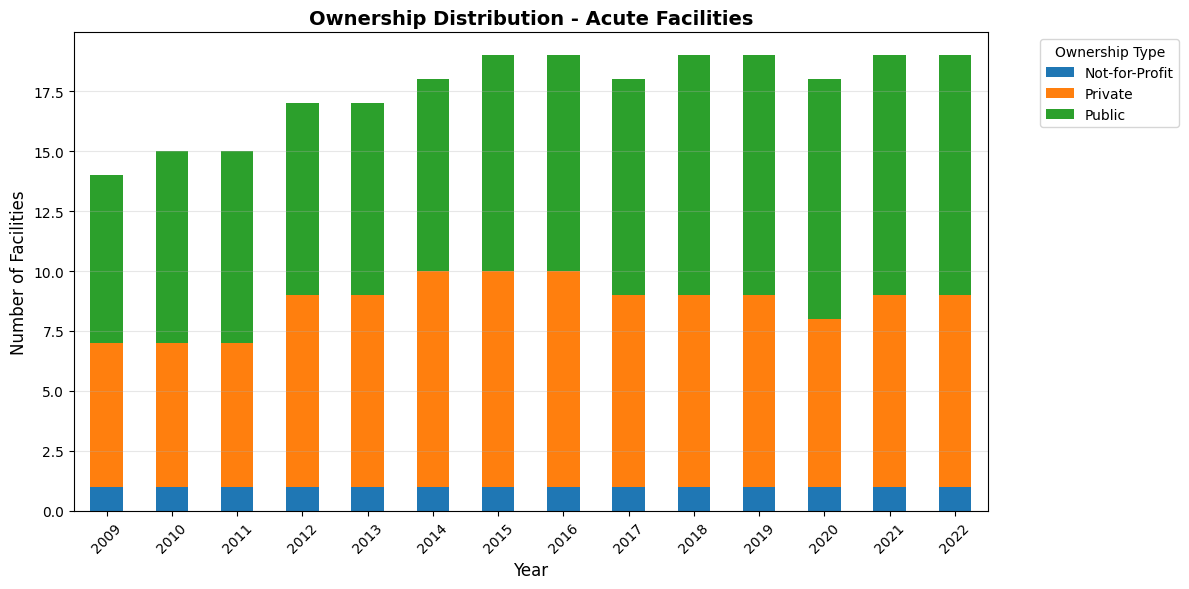

<Figure size 1400x800 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

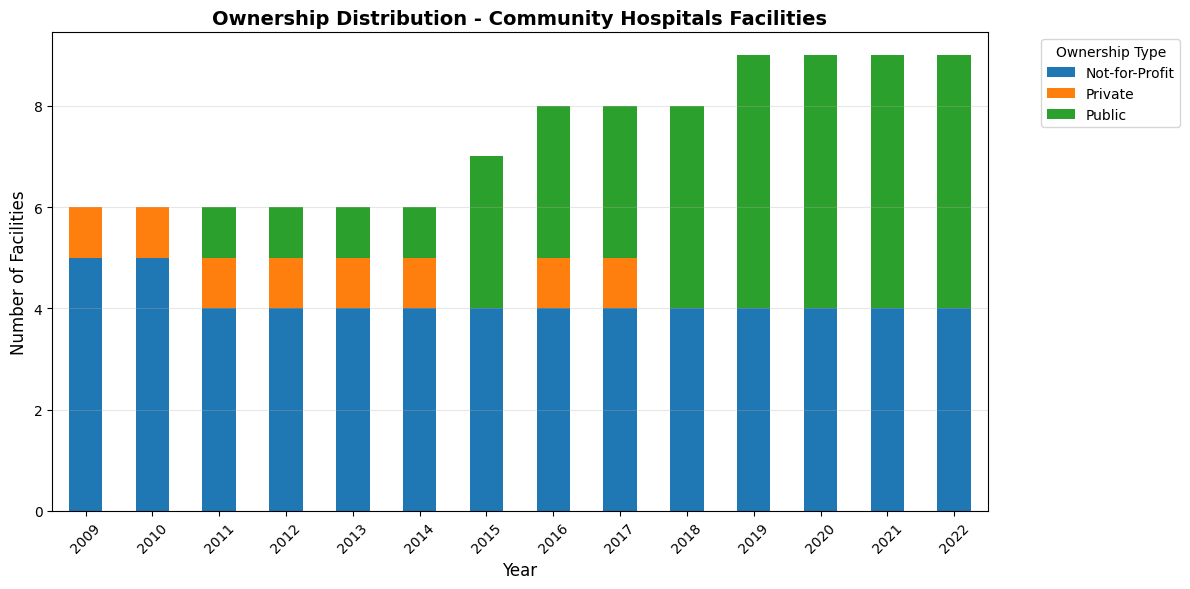

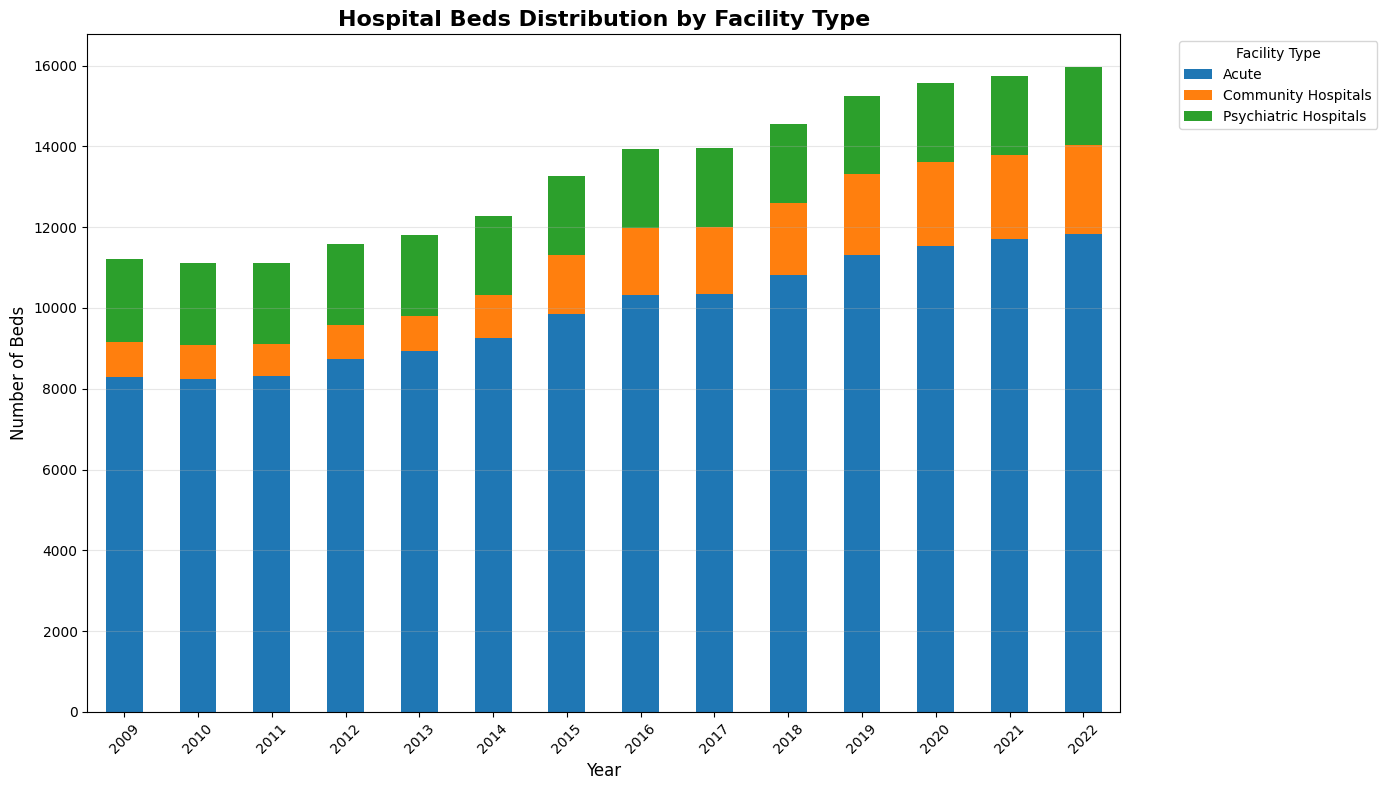

<Figure size 1400x800 with 0 Axes>

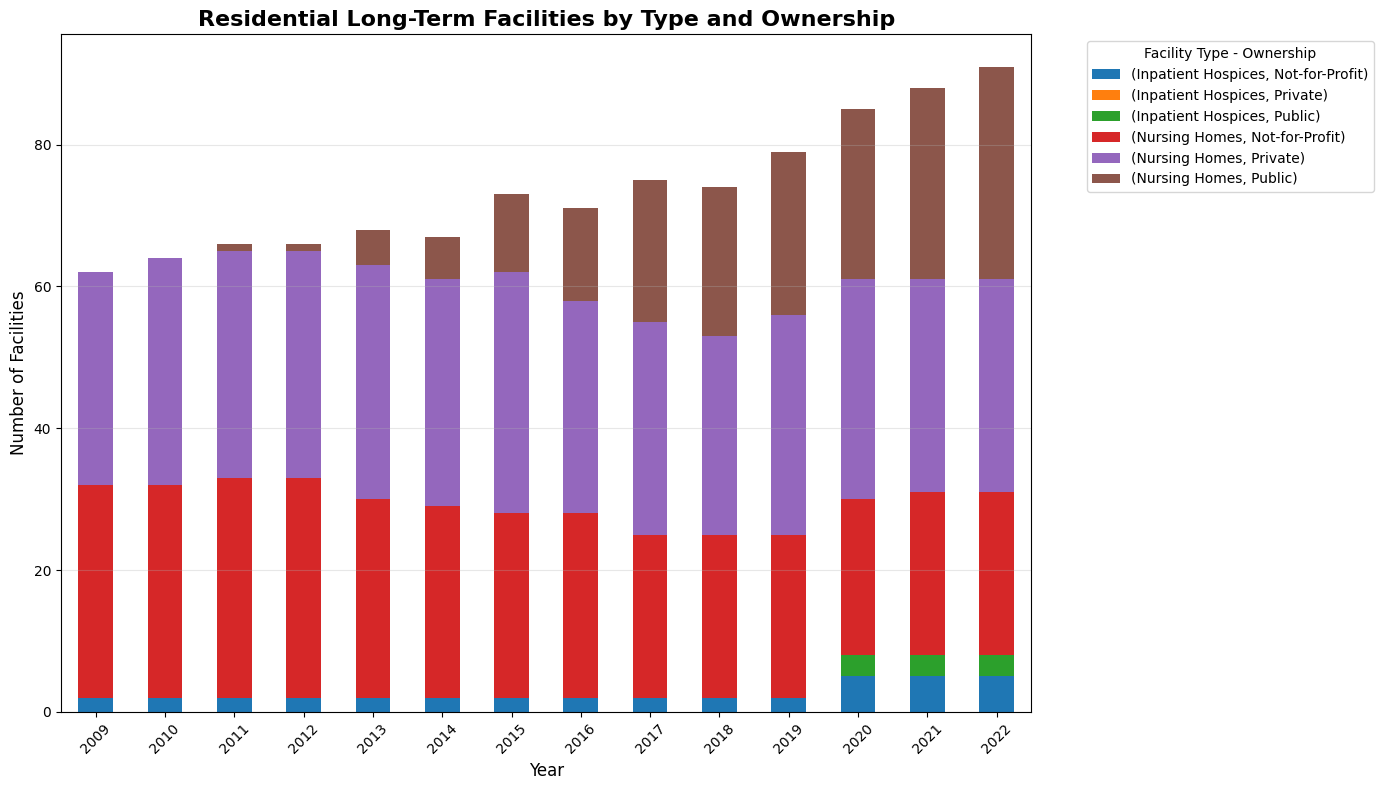


Summary Statistics:
                                     no_of_facilities        no_beds         
                                                  sum   mean     sum     mean
facility_type_a       public_private                                         
Acute                 Not-for-Profit               14   1.00    4010   286.43
                      Private                     108   7.71   20096  1435.43
                      Public                      124   8.86  115390  8242.14
Community Hospitals   Not-for-Profit               58   4.14   12354   882.43
                      Private                       8   0.57     176    12.57
                      Public                       37   2.64    7644   546.00
Inpatient Hospices    Not-for-Profit               37   2.64    1964   140.29
                      Private                       0   0.00       0     0.00
                      Public                        9   0.64     492    35.14
Nursing Homes         Not-for-Profit       

In [13]:
def plot_categorical_graph(df, title="Healthcare Facilities by Type and Ownership"):
    """
    Create a stacked column chart showing facility types by ownership over time
    """
    # Create pivot table for stacked bar chart
    pivot_df = df.pivot_table(
        index='year',
        columns=['facility_type_a', 'public_private'],
        values='no_of_facilities',
        aggfunc='sum'
    ).fillna(0)

    # Plotting
    plt.figure(figsize=(14, 8))

    # Create stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Facilities', fontsize=12)
    plt.legend(title='Facility Type - Ownership', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    return ax

def plot_beds_by_facility_type(df, title="Hospital Beds by Facility Type"):
    """
    Create a stacked column chart showing beds by facility type over time
    """
    # Filter only Hospital data for this chart
    hospital_df = df[df['institution_type'] == 'Hospital']

    # Create pivot table
    pivot_df = hospital_df.pivot_table(
        index='year',
        columns='facility_type_a',
        values='no_beds',
        aggfunc='sum'
    ).fillna(0)

    # Plotting
    plt.figure(figsize=(14, 8))

    # Create stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Beds', fontsize=12)
    plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    return ax

def plot_ownership_comparison(df, facility_type='Acute', title="Ownership Comparison"):
    """
    Create a stacked column chart comparing ownership types for a specific facility type
    """
    # Filter data for specific facility type
    filtered_df = df[df['facility_type_a'] == facility_type]

    # Create pivot table
    pivot_df = filtered_df.pivot_table(
        index='year',
        columns='public_private',
        values='no_of_facilities',
        aggfunc='sum'
    ).fillna(0)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Create stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

    plt.title(f"{title} - {facility_type} Facilities", fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Facilities', fontsize=12)
    plt.legend(title='Ownership Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    return ax

# Load your data
df = pd.read_csv('DataGov_Health Facilities_Public.csv')

# Display basic information about the data
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Create the categorical graphs
print("\nCreating categorical graphs...")

# Graph 1: All facilities by type and ownership
plt.figure(1)
plot_categorical_graph(df, "Healthcare Facilities by Type and Ownership Over Time")

# Graph 2: Hospital beds by facility type
plt.figure(2)
plot_beds_by_facility_type(df, "Hospital Beds Distribution by Facility Type")

# Graph 3: Ownership comparison for Acute facilities
plt.figure(3)
plot_ownership_comparison(df, 'Acute', "Ownership Distribution")

# Graph 4: Ownership comparison for Community Hospitals
plt.figure(4)
plot_ownership_comparison(df, 'Community Hospitals', "Ownership Distribution")

# Graph 5: Residential Long-Term facilities
residential_df = df[df['institution_type'] == 'Residential Long-Term']
plt.figure(5)
plot_categorical_graph(residential_df, "Residential Long-Term Facilities by Type and Ownership")

# Show all plots
plt.show()

# Additional analysis: Create a summary table
print("\nSummary Statistics:")
summary = df.groupby(['facility_type_a', 'public_private']).agg({
    'no_of_facilities': ['sum', 'mean'],
    'no_beds': ['sum', 'mean']
}).round(2)
print(summary)

In [52]:
# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [53]:
def plot_pie_chart(df, year=2022, title="Facility Distribution"):
    """
    Create a pie chart showing facility distribution for a specific year
    """
    # Filter data for specific year
    year_df = df[df['year'] == year]

    # Group by facility type
    facility_totals = year_df.groupby('facility_type_a')['no_of_facilities'].sum()

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.pie(facility_totals, labels=facility_totals.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{title} ({year})', fontsize=16, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()

    return facility_totals

<Figure size 800x550 with 0 Axes>

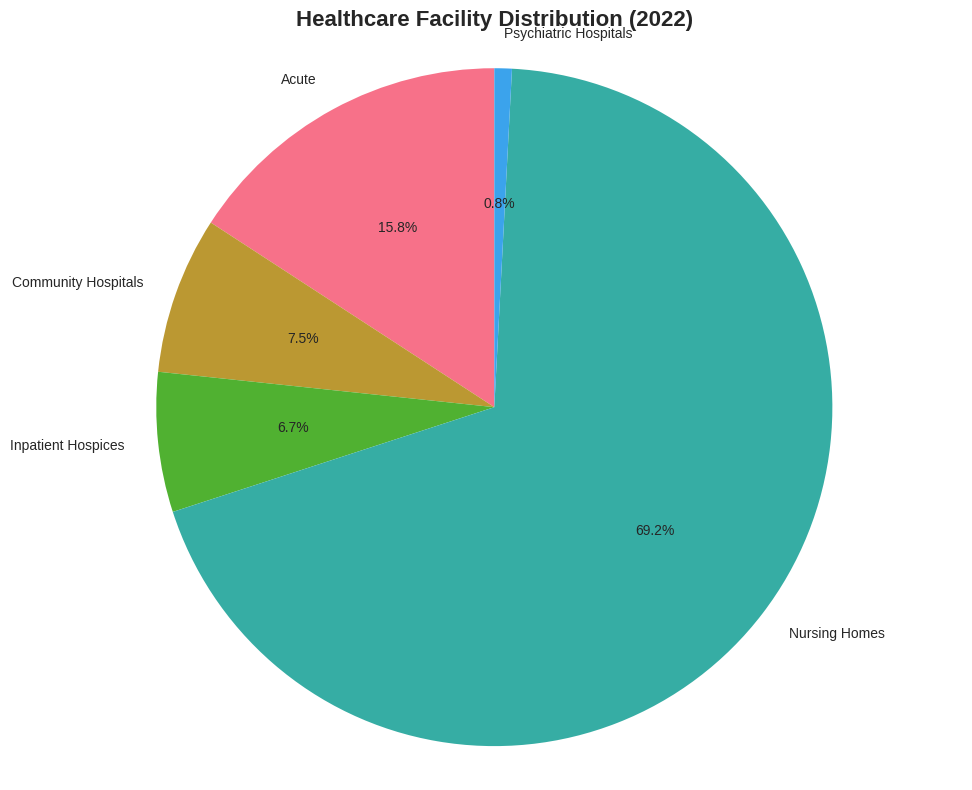


SUMMARY STATISTICS

Pie Chart Data (2022):
facility_type_a
Acute                    19
Community Hospitals       9
Inpatient Hospices        8
Nursing Homes            83
Psychiatric Hospitals     1
Name: no_of_facilities, dtype: int64


In [81]:
# 1. Pie Chart - Facility Distribution (2022)
plt.figure(1)
pie_data = plot_pie_chart(df, 2022, "Healthcare Facility Distribution")

# Show plot
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"\nPie Chart Data (2022):")
print(pie_data)

In [64]:
def plot_stacked_bar_facilities(df, title="Facilities by Type and Year"):
    """
    Create a stacked bar chart showing facilities by type over years
    """
    # Create pivot table
    pivot_df = df.pivot_table(
        index='year',
        columns='facility_type_a',
        values='no_of_facilities',
        aggfunc='sum'
    ).fillna(0)

    # Plotting
    plt.figure(figsize=(14, 8))
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Facilities', fontsize=12)
    plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    return pivot_df

<Figure size 800x550 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

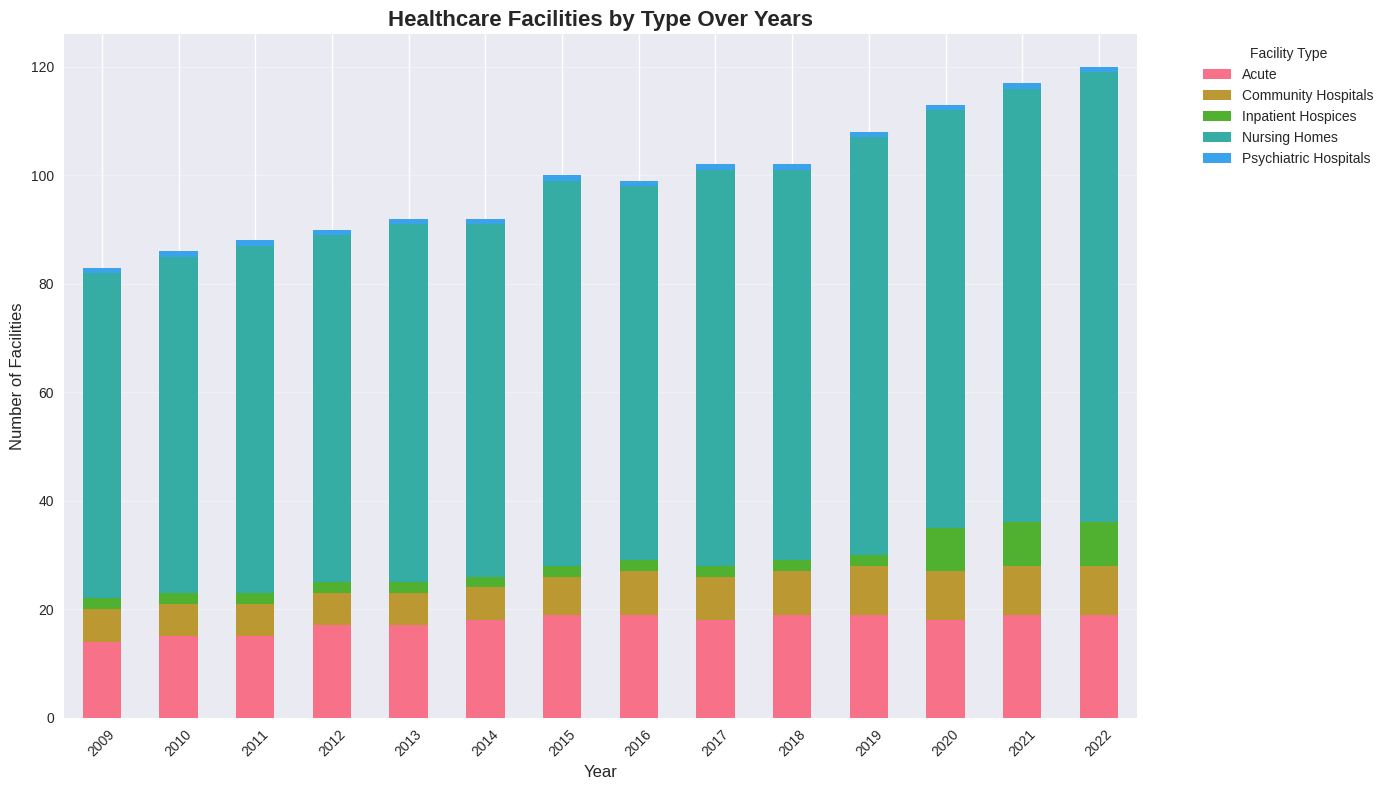


SUMMARY STATISTICS

Total Facilities by Type (All Years):
facility_type_a
Acute                    246
Community Hospitals      103
Inpatient Hospices        46
Nursing Homes            983
Psychiatric Hospitals     14
Name: no_of_facilities, dtype: int64


In [82]:
# 3. Stacked Bar Chart - Facilities by Type
plt.figure(3)
stacked_data = plot_stacked_bar_facilities(df, "Healthcare Facilities by Type Over Years")

# Show plot
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"\nTotal Facilities by Type (All Years):")
total_by_type = df.groupby('facility_type_a')['no_of_facilities'].sum()
print(total_by_type)

In [88]:
def plot_area_chart(df, title="Cumulative Facilities Over Time"):
    """
    Create an area chart showing cumulative facilities over time
    """
    # Group by year and facility type
    yearly_totals = df.groupby(['year', 'facility_type_a'])['no_of_facilities'].sum().unstack().fillna(0)

    # Plotting
    plt.figure(figsize=(14, 8))
    ax = yearly_totals.plot(kind='area', figsize=(14, 8), alpha=0.7)

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Cumulative Number of Facilities', fontsize=12)
    plt.legend(title='Facility Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    return yearly_totals

<Figure size 800x550 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

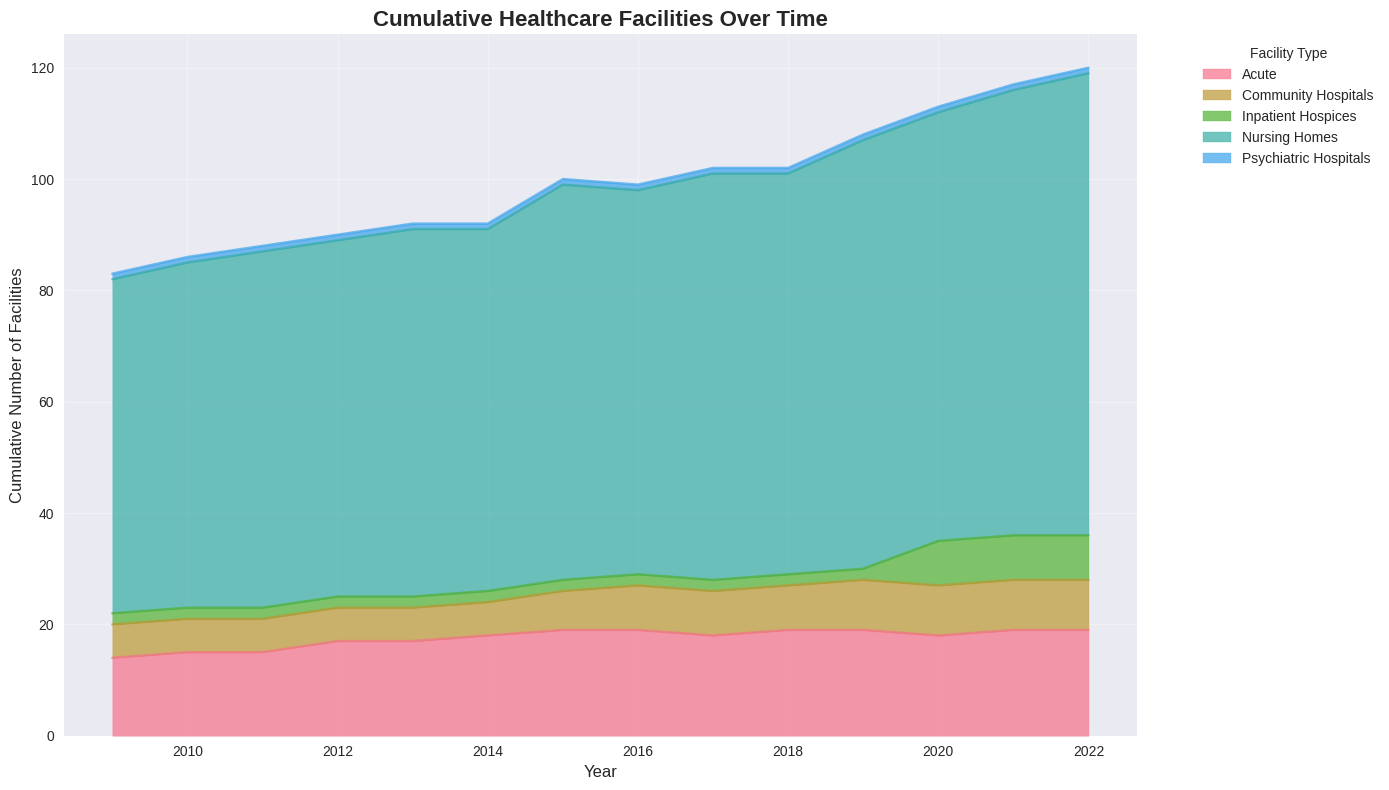

In [91]:
# 5. Area Chart - Cumulative Facilities
plt.figure(5)
area_data = plot_area_chart(df, "Cumulative Healthcare Facilities Over Time")

# Show plot
plt.show()

In [69]:
def plot_heatmap_facilities(df, title="Facilities Heatmap by Year and Type"):
    """
    Create a heatmap showing facilities distribution
    """
    # Create pivot table
    pivot_df = df.pivot_table(
        index='year',
        columns='facility_type_a',
        values='no_of_facilities',
        aggfunc='sum'
    ).fillna(0)

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Facility Type', fontsize=12)
    plt.ylabel('Year', fontsize=12)
    plt.tight_layout()

    return pivot_df

<Figure size 800x550 with 0 Axes>

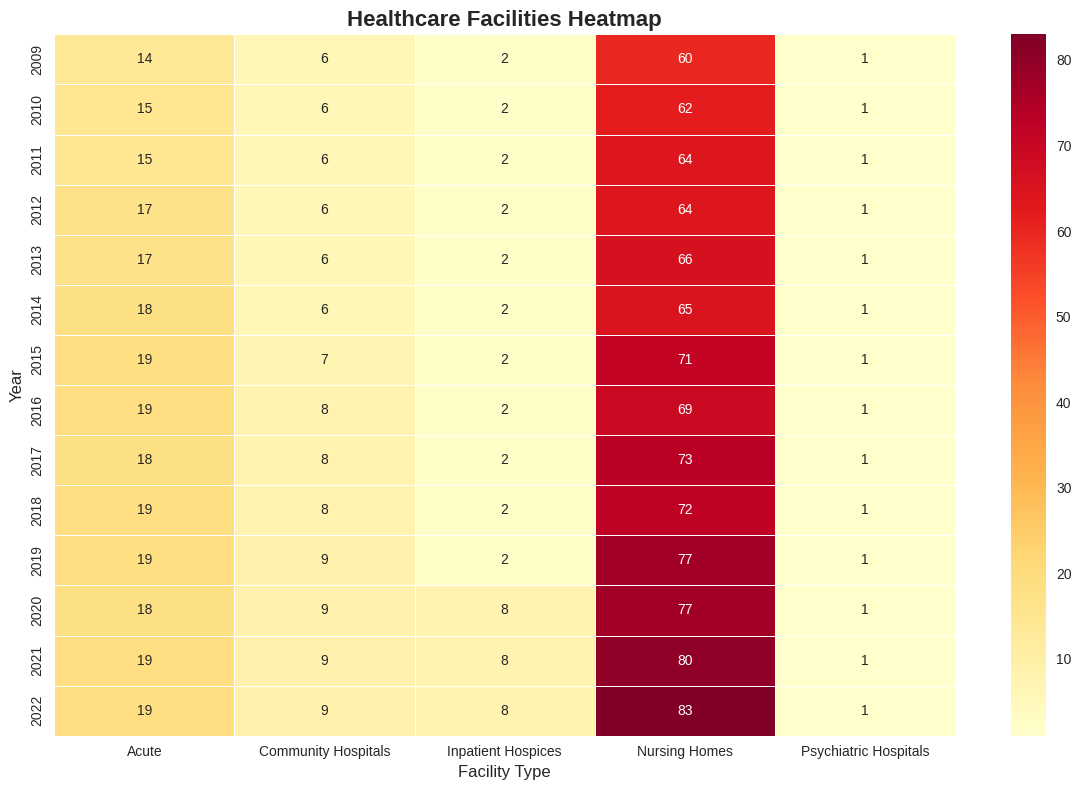


SUMMARY STATISTICS

Year-over-Year Total Facilities Growth:
year
2009     NaN
2010    3.61
2011    2.33
2012    2.27
2013    2.22
2014    0.00
2015    8.70
2016   -1.00
2017    3.03
2018    0.00
2019    5.88
2020    4.63
2021    3.54
2022    2.56
Name: no_of_facilities, dtype: float64


In [92]:
# 8. Heatmap - Facilities Distribution
plt.figure(8)
heatmap_data = plot_heatmap_facilities(df, "Healthcare Facilities Heatmap")

# Show plot
plt.show()

# Print summary statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

# Additional analysis: Year-over-year growth
print(f"\nYear-over-Year Total Facilities Growth:")
yearly_totals = df.groupby('year')['no_of_facilities'].sum()
yearly_growth = yearly_totals.pct_change() * 100
print(yearly_growth.round(2))

In [86]:
# Display basic information
print("Dataset Info")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              210 non-null    int64 
 1   institution_type  210 non-null    object
 2   facility_type_a   210 non-null    object
 3   public_private    210 non-null    object
 4   no_of_facilities  210 non-null    int64 
 5   no_beds           210 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.0+ KB
None

First few rows:
   year institution_type facility_type_a  public_private  no_of_facilities  \
0  2009         Hospital           Acute          Public                 7   
1  2009         Hospital           Acute  Not-for-Profit                 1   
2  2009         Hospital           Acute         Private                 6   
3  2010         Hospital           Acute          Public                 8   
4  2010         Hospital           Acute  Not-for-Pr

In [17]:
# Data Cleaning
# Ensure correct data types
df_nursinghome = df_nursinghome.reset_index()
df_nursinghome['year'] = pd.to_numeric(df_nursinghome['year'], errors='coerce')
df_nursinghome['no_beds'] = pd.to_numeric(df_nursinghome['no_beds'], errors='coerce')

# Drop rows with missing essential values
df_nursinghome = df_nursinghome.dropna(subset=['year', 'no_beds'])

# Try to identify category columns
type_col = None
for possible in ['type', 'Type', 'facility_type_a']:
    if possible in df_nursinghome.columns:
        type_col = possible
        break

ownership_col = None
for possible in ['ownership', 'Ownership', 'public_private', 'Owner']:
    if possible in df_nursinghome.columns:
        ownership_col = possible
        break

In [18]:
# Function 1: Grouped Bar Chart by Facility Type
def plot_categorical_bar_by_type(df, type_col):
    """
    Grouped bar chart comparing average number of beds per facility type by year.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    df_grouped = df.groupby(['year', type_col], as_index=False)['no_beds'].sum()

    plt.figure(figsize=(12, 6), dpi=144)
    sns.barplot(data=df_grouped, x='year', y='no_beds', hue=type_col, palette='tab20')
    plt.title("Categorical Graph: Nursing Home Beds by Facility Type and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

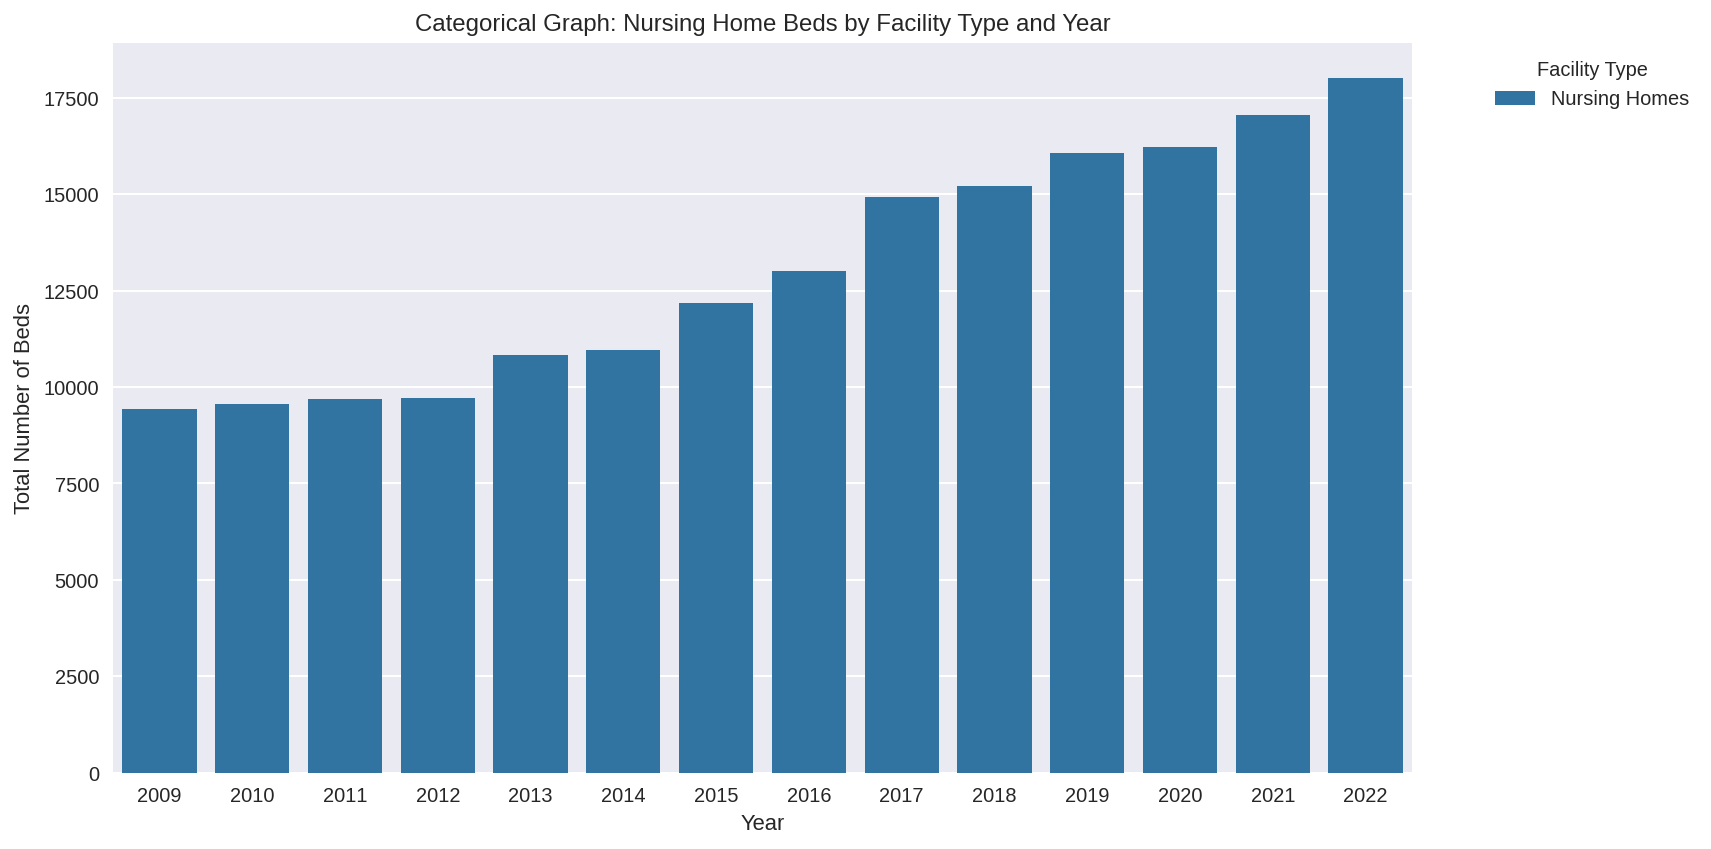

In [19]:
# Call the functions
plot_categorical_bar_by_type(df_nursinghome, type_col)

In [20]:
# Function 2: Stacked Bar Chart by Ownership
def plot_categorical_stacked_bar_by_ownership(df, ownership_col):
    """
    Stacked bar chart showing total nursing home beds by ownership each year.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    df_grouped = df.groupby(['year', ownership_col], as_index=False)['no_beds'].sum()
    df_pivot = df_grouped.pivot(index='year', columns=ownership_col, values='no_beds').fillna(0)

    # Plot stacked bar chart
    df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')
    plt.title("Stacked Bar Chart: Nursing Home Beds by Ownership and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Ownership", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

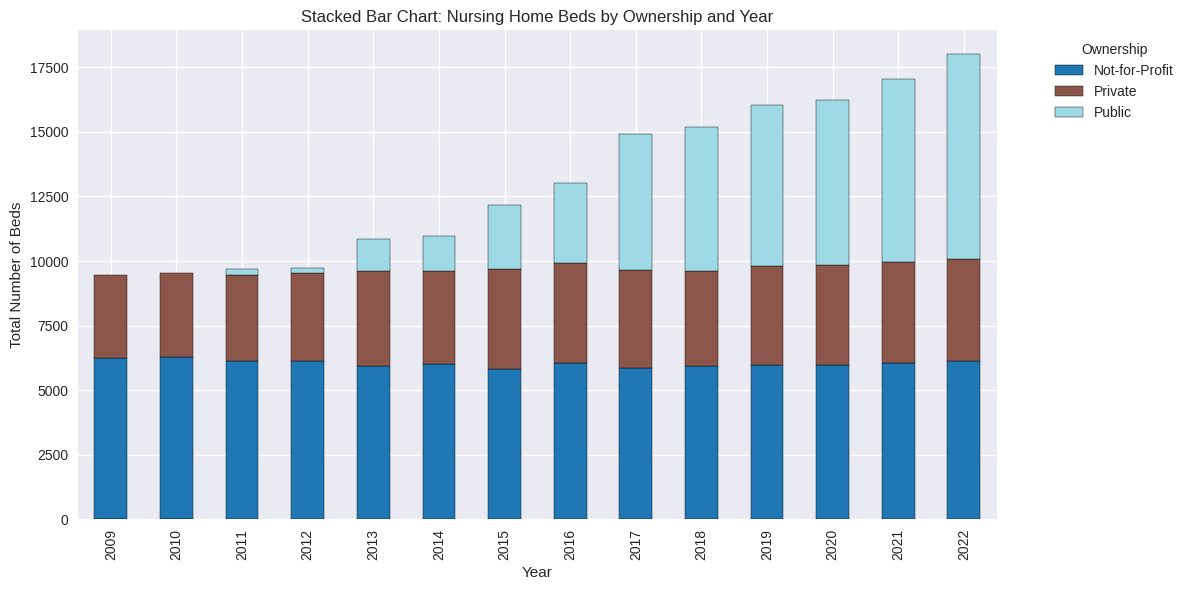

In [21]:
# Call the functions
plot_categorical_stacked_bar_by_ownership(df_nursinghome, ownership_col)

In [22]:
# Function 3: Boxplot comparing distribution of beds by ownership
def plot_categorical_box(df, ownership_col):
    """
    Boxplot to compare the distribution of nursing home beds by ownership.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    plt.figure(figsize=(8, 6), dpi=144)
    sns.boxplot(data=df, x=ownership_col, y='no_beds', palette='pastel')
    plt.title("Distribution of Nursing Home Beds by Ownership (Boxplot)")
    plt.xlabel("Ownership")
    plt.ylabel("Number of Beds per Facility")
    plt.tight_layout()
    plt.show()

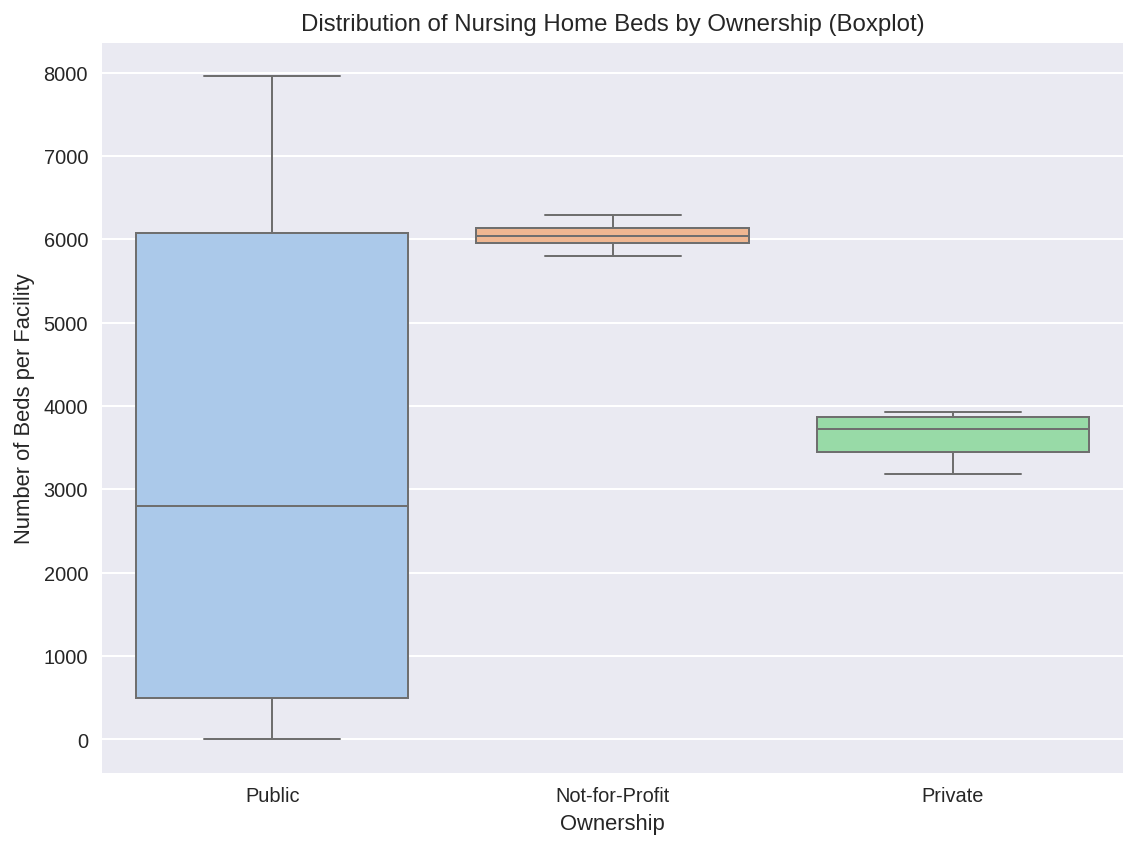

In [23]:
# Call the functions
plot_categorical_box(df_nursinghome, ownership_col)

# **3. Statistical Graph**

In [24]:
# Load the datasets
df_healthy_life = pd.read_csv('WHO_SG_Healthy Life Expectancy at Birth.csv')
df_life_expectancy = pd.read_csv('WHO_SG_Life Expectancy at Birth.csv')
df_death_causes = pd.read_csv('WHO_SG_Top Causes of Death.csv')


In [25]:
# Data Preparation Functions
def prepare_life_expectancy_data(df_healthy, df_life):
    """Prepare and merge healthy life expectancy and total life expectancy data"""
    # Clean and filter data
    healthy_clean = df_healthy[['DIM_TIME', 'DIM_SEX', 'AMOUNT_N']].copy()
    life_clean = df_life[['DIM_TIME', 'DIM_SEX', 'AMOUNT_N']].copy()

    # Rename columns for clarity
    healthy_clean.columns = ['Year', 'Sex', 'Healthy_Life_Expectancy']
    life_clean.columns = ['Year', 'Sex', 'Total_Life_Expectancy']

    # Merge datasets
    merged_df = pd.merge(healthy_clean, life_clean, on=['Year', 'Sex'])

    # Calculate unhealthy years
    merged_df['Unhealthy_Years'] = merged_df['Total_Life_Expectancy'] - merged_df['Healthy_Life_Expectancy']

    return merged_df


In [26]:
# Data Preparation Functions
def prepare_death_causes_data(df):
    """Prepare death causes data for analysis"""
    # Filter out zero values and sort by death rate
    df_filtered = df[df['VAL_DTHS_RATE100K_NUMERIC'] > 0].copy()
    df_sorted = df_filtered.sort_values('VAL_DTHS_RATE100K_NUMERIC', ascending=False)

    return df_sorted

In [27]:
 # Prepare data
 df_life_merged = prepare_life_expectancy_data(df_healthy_life, df_life_expectancy)
 df_death_causes_clean = prepare_death_causes_data(df_death_causes)

In [28]:
# Plotting Functions
def plot_life_expectancy_trends(df):
    """Line chart showing life expectancy trends by gender over time"""
    plt.figure(figsize=(12, 8))

    for sex in df['Sex'].unique():
        df_sex = df[df['Sex'] == sex]
        plt.plot(df_sex['Year'], df_sex['Total_Life_Expectancy'],
                marker='o', linewidth=2, label=f'Total Life Expectancy - {sex}')
        plt.plot(df_sex['Year'], df_sex['Healthy_Life_Expectancy'],
                marker='s', linewidth=2, linestyle='--', label=f'Healthy Life Expectancy - {sex}')

    plt.title('Life Expectancy Trends in Singapore (2000-2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


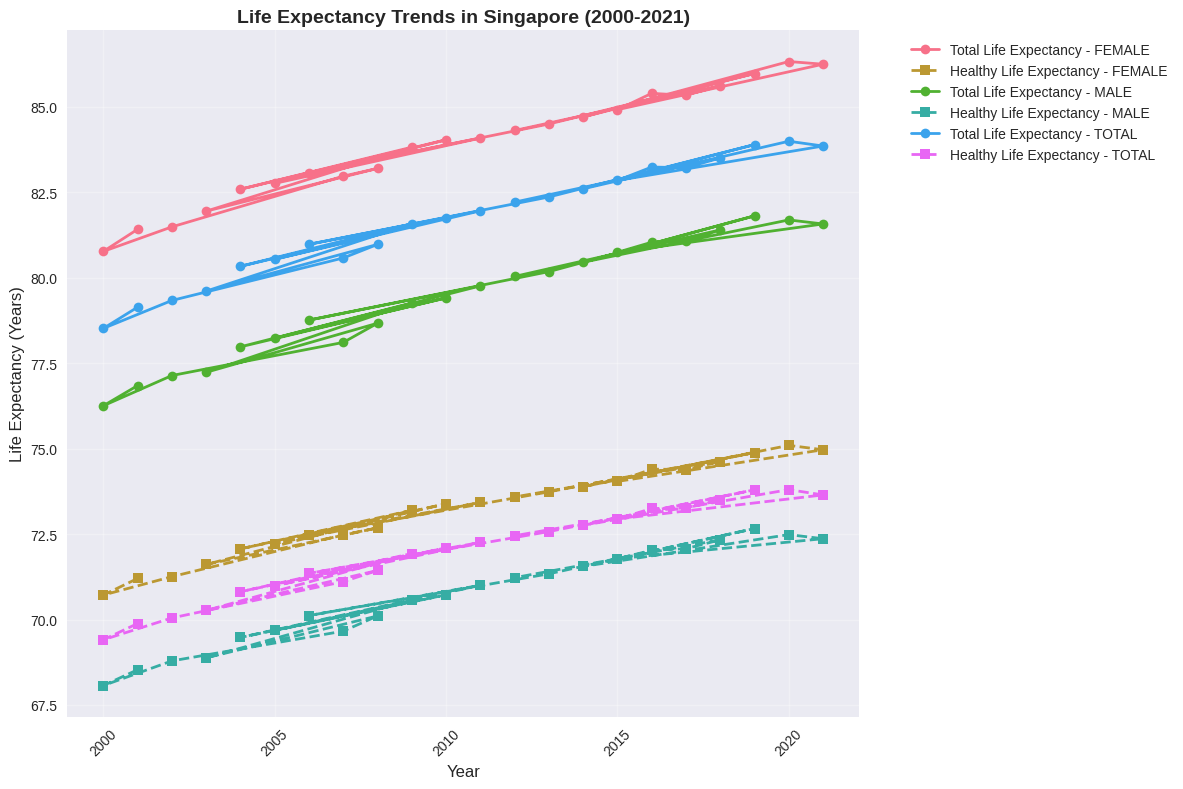

In [29]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_life_expectancy_trends(df_life_merged)

In [30]:
# Plotting Functions
def plot_healthy_vs_unhealthy_years(df):
    """Stacked bar chart showing healthy vs unhealthy years"""
    df_total = df[df['Sex'] == 'TOTAL']

    fig, ax = plt.subplots(figsize=(14, 8))

    years = df_total['Year']
    healthy = df_total['Healthy_Life_Expectancy']
    unhealthy = df_total['Unhealthy_Years']

    ax.bar(years, healthy, label='Healthy Years', color='green', alpha=0.7)
    ax.bar(years, unhealthy, bottom=healthy, label='Unhealthy Years', color='red', alpha=0.7)

    plt.title('Healthy vs Unhealthy Years in Singapore (Total Population)', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


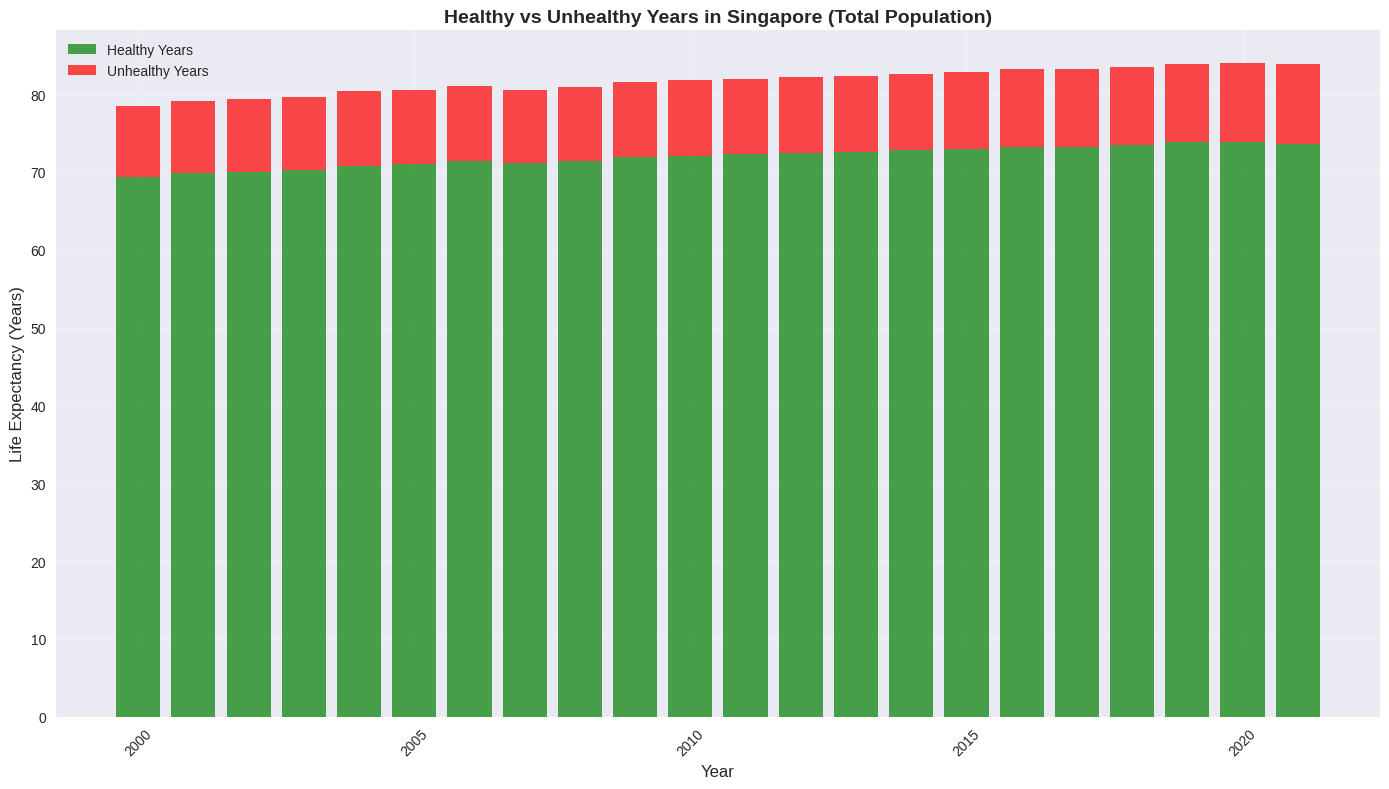

In [31]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_healthy_vs_unhealthy_years(df_life_merged)

In [32]:
# Plotting Functions
def plot_gender_comparison(df):
    """Box plot comparing life expectancy distributions by gender"""
    plt.figure(figsize=(10, 6))

    data_to_plot = []
    labels = []

    for sex in ['MALE', 'FEMALE']:
        df_sex = df[df['Sex'] == sex]
        data_to_plot.append(df_sex['Total_Life_Expectancy'])
        labels.append(sex)

    plt.boxplot(data_to_plot, labels=labels)
    plt.title('Distribution of Life Expectancy by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


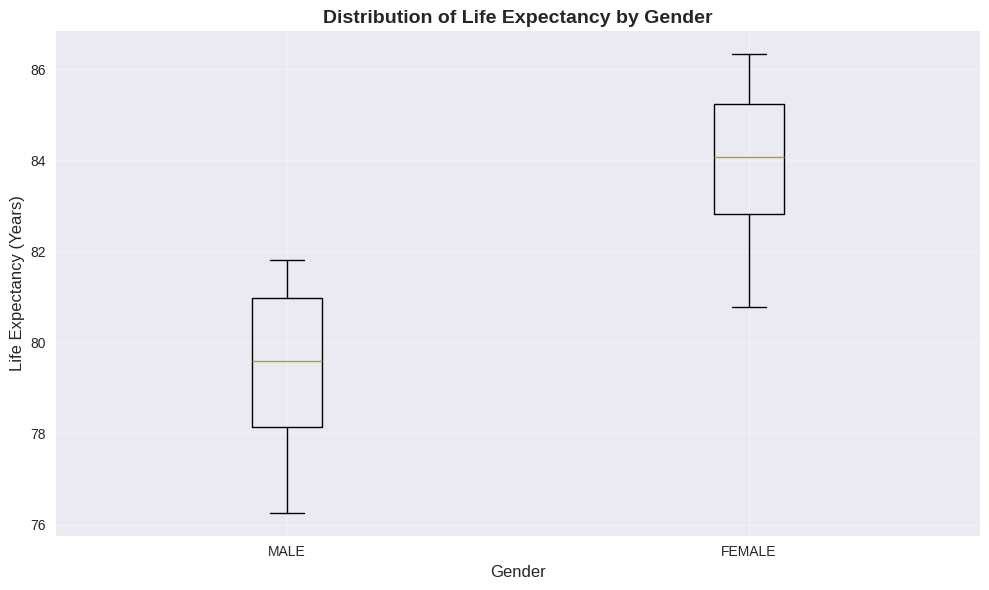

In [33]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_gender_comparison(df_life_merged)

In [34]:
# Plotting Functions
def plot_top_death_causes(df, top_n=15):
    """Horizontal bar chart of top causes of death"""
    top_causes = df.head(top_n)

    plt.figure(figsize=(12, 8))
    plt.barh(top_causes['DIM_GHECAUSE_TITLE'], top_causes['VAL_DTHS_RATE100K_NUMERIC'])
    plt.title(f'Top {top_n} Causes of Death in Singapore (2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Death Rate per 100,000 Population', fontsize=12)
    plt.ylabel('Cause of Death', fontsize=12)
    plt.gca().invert_yaxis()  # Highest values at top
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


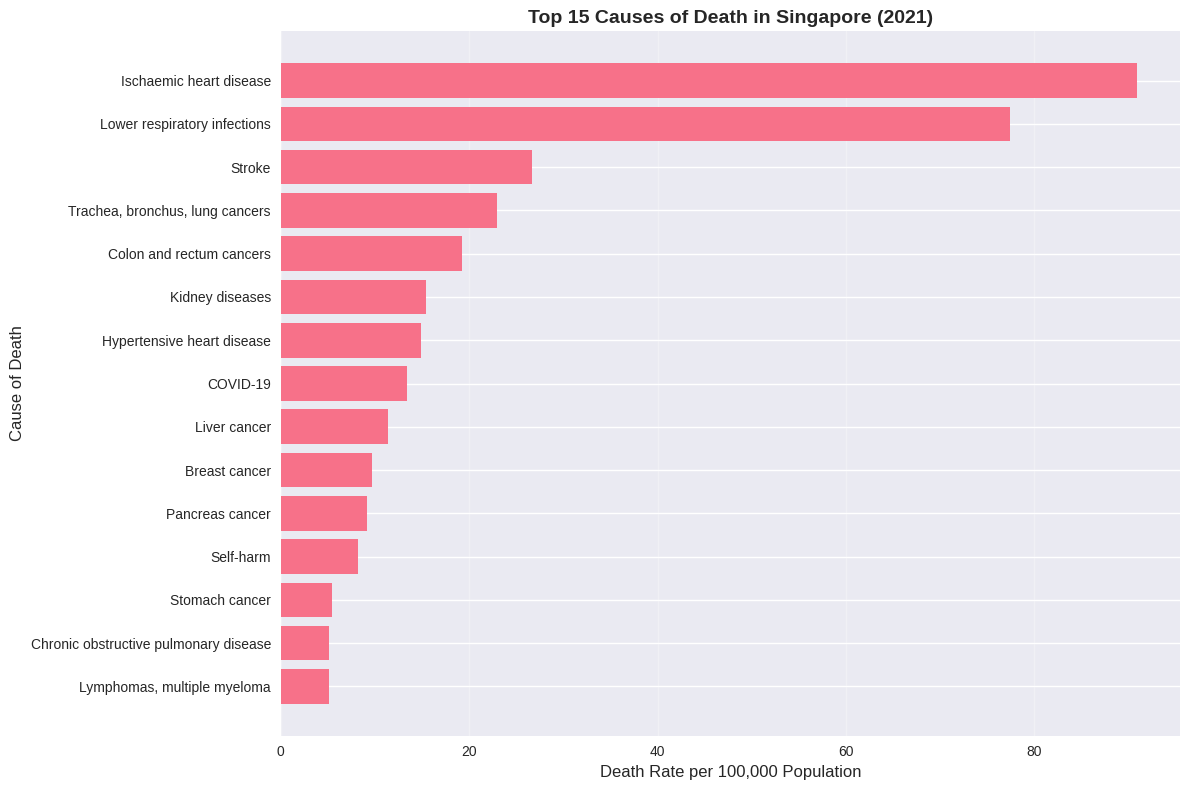

In [35]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_top_death_causes(df_death_causes_clean, top_n=15)

In [36]:
# Plotting Functions
def plot_death_causes_histogram(df):
    """Histogram showing distribution of death rates"""
    plt.figure(figsize=(10, 6))
    plt.hist(df['VAL_DTHS_RATE100K_NUMERIC'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Death Rates for Different Causes (Singapore 2021)', fontsize=14, fontweight='bold')
    plt.xlabel('Death Rate per 100,000 Population', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


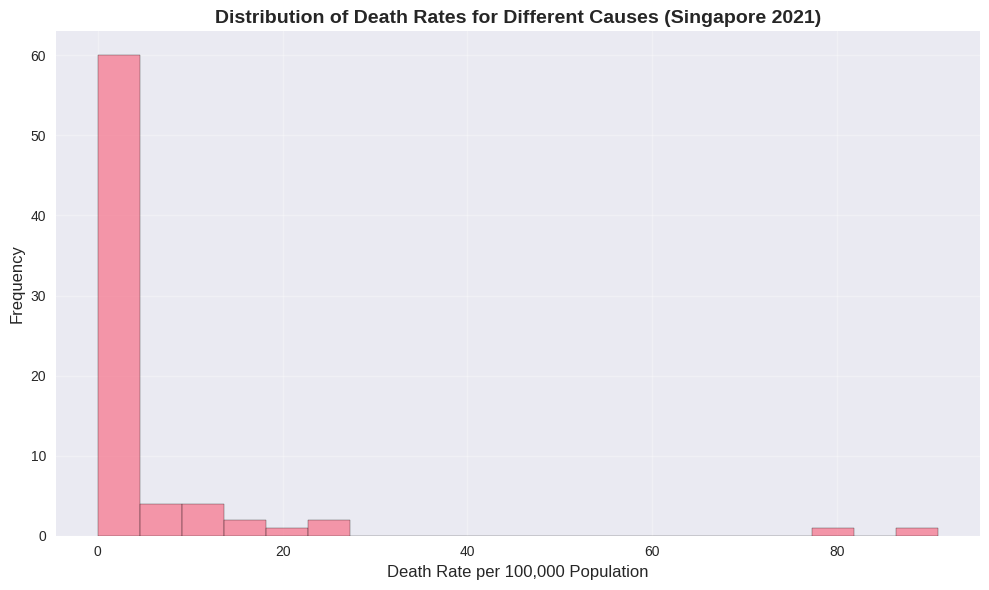

In [37]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_death_causes_histogram(df_death_causes_clean)

In [38]:
# Plotting Functions
def plot_life_expectancy_regression(df):
    """Scatter plot with regression line showing relationship between healthy and total life expectancy"""
    plt.figure(figsize=(10, 8))

    colors = {'MALE': 'blue', 'FEMALE': 'red', 'TOTAL': 'green'}

    for sex in df['Sex'].unique():
        df_sex = df[df['Sex'] == sex]
        plt.scatter(df_sex['Healthy_Life_Expectancy'], df_sex['Total_Life_Expectancy'],
                   c=colors[sex], label=sex, alpha=0.7, s=60)

        # Add regression line
        z = np.polyfit(df_sex['Healthy_Life_Expectancy'], df_sex['Total_Life_Expectancy'], 1)
        p = np.poly1d(z)
        plt.plot(df_sex['Healthy_Life_Expectancy'], p(df_sex['Healthy_Life_Expectancy']),
                color=colors[sex], linestyle='--', alpha=0.8)

    plt.title('Relationship Between Healthy and Total Life Expectancy', fontsize=14, fontweight='bold')
    plt.xlabel('Healthy Life Expectancy (Years)', fontsize=12)
    plt.ylabel('Total Life Expectancy (Years)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Generating Statistical Graphs...


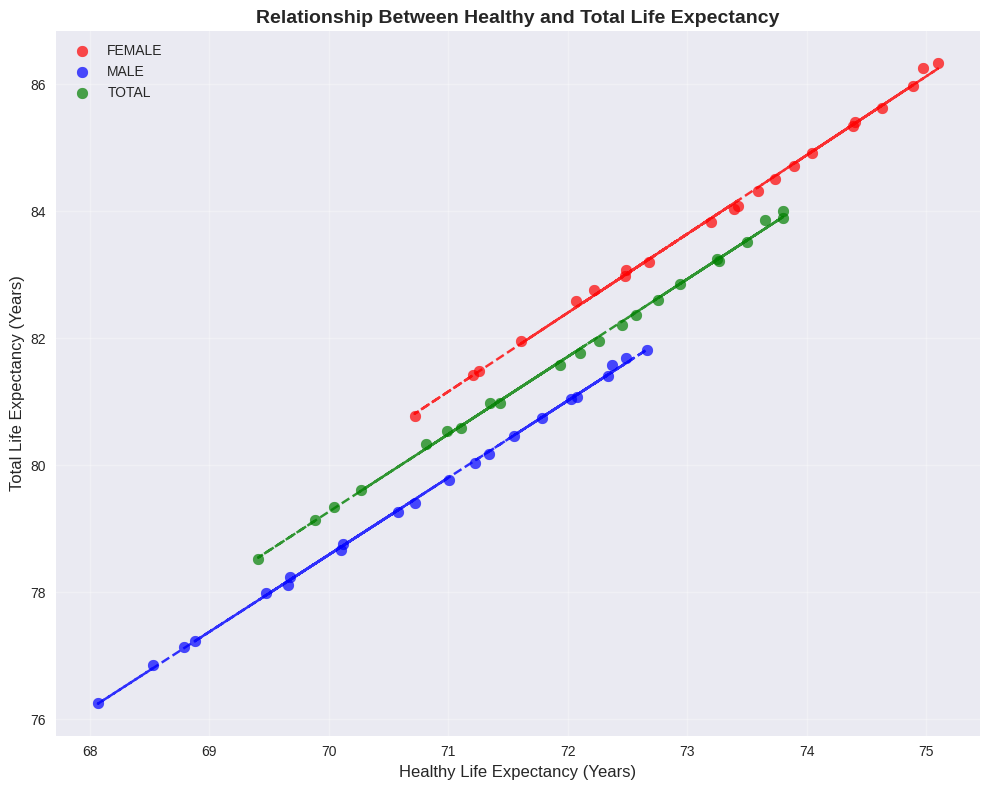

In [39]:
 # Generate plots
 print("Generating Statistical Graphs...")

 plot_life_expectancy_regression(df_life_merged)

In [40]:
# Plotting Functions
# Main Analysis
def main():
    print("Singapore Health Statistics Analysis")
    print("=" * 40)


In [41]:
 # Prepare data
 # df_life_merged = prepare_life_expectancy_data(df_healthy_life, df_life_expectancy)
 # df_death_causes_clean = prepare_death_causes_data(df_death_causes)

In [42]:
# Display basic statistics
print("Basic Statistics - Life Expectancy:")
print(df_life_merged.groupby('Sex')[['Total_Life_Expectancy', 'Healthy_Life_Expectancy']].describe())


Basic Statistics - Life Expectancy:
       Total_Life_Expectancy                                             \
                       count       mean       std        min        25%   
Sex                                                                       
FEMALE                  22.0  83.889001  1.630924  80.774170  82.816018   
MALE                    22.0  79.441354  1.712038  76.257304  78.140975   
TOTAL                   22.0  81.686158  1.658053  78.520888  80.552055   

                                        Healthy_Life_Expectancy             \
              50%        75%        max                   count       mean   
Sex                                                                          
FEMALE  84.063748  85.234844  86.329270                    22.0  73.198343   
MALE    79.588031  80.968067  81.813664                    22.0  70.703145   
TOTAL   81.860970  83.128436  83.996536                    22.0  71.981017   

                                            

In [43]:
# Display basic statistics
print(f"Death Causes Analysis")
print(f"Total causes with non-zero death rates: {len(df_death_causes_clean)}")
print(f"Average death rate: {df_death_causes_clean['VAL_DTHS_RATE100K_NUMERIC'].mean():.2f} per 100,000")
print(f"Median death rate: {df_death_causes_clean['VAL_DTHS_RATE100K_NUMERIC'].median():.2f} per 100,000")

Death Causes Analysis
Total causes with non-zero death rates: 75
Average death rate: 5.27 per 100,000
Median death rate: 0.68 per 100,000


In [44]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_life_expectancy_trends(df_life_merged)

In [45]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_healthy_vs_unhealthy_years(df_life_merged)

In [46]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_gender_comparison(df_life_merged)

In [47]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_top_death_causes(df_death_causes_clean, top_n=15)

In [48]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_death_causes_histogram(df_death_causes_clean)

In [49]:
 # Generate plots
 # print("Generating Statistical Graphs...")

 # plot_life_expectancy_regression(df_life_merged)

In [50]:
print("Analysis complete! All graphs have been generated.")

Analysis complete! All graphs have been generated.


In [51]:
# Execute the main function
if __name__ == "__main__":
    main()

Singapore Health Statistics Analysis
